### Student Information
Name: 李佾昀 Lee, I-Yun

Student ID: 107034013

GitHub ID: tool0717

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

---
# Part 1 : Take Home

In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
### Begin Assignment Here

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

##  Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
#Answer here
X[X['category']==1][["text"]][:5]

text
0   From: sd345@city.ac.uk (Michael Collier) Subje...
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...

## Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
# Answer here
for i in NA_df['missing_example']:
    print(type(i))

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


### illustration
Data such as 'NaN', 'None', '' were 'str' type, while the function ```.isnull()``` is not designed to distingiush contents of strings. That is, the function can't tell if 'None' and other strings are actually null data or only general content that happened to be the word 'None'.

## Exercise 6 (take home):

In [7]:
X[0:5]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

In [8]:
X_sample = X.sample(n=1000) #random state
X_sample[0:5]

text  category  \
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
1384  From: mccurdy@ucsvax.sdsu.edu (McCurdy M.) Sub...         2   
1520  From: jacquier@gsbux1.uchicago.edu (Eric Jacqu...         2   
905   From: maridai@comm.mot.com (Marida Ignacio) Su...         3   
789   From: davem@bnr.ca (Dave Mielke) Subject: Does...         3   

               category_name  
4     soc.religion.christian  
1384                 sci.med  
1520                 sci.med  
905   soc.religion.christian  
789   soc.religion.christian

In [9]:
X[0:5]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### Answer
Through observating the outputs above, we can simply tell that the ```.sample()``` process does not influence the original dataset ```X```.
There's no change compared to the previous state of ```X```.

## Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

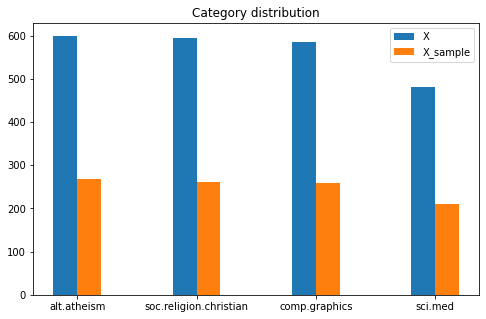

In [11]:
import matplotlib.pyplot as plt
blue_bar = X.category_name.value_counts().values.tolist()
orange_bar = X_sample.category_name.value_counts().values.tolist()
# print(blue_bar)
# print(orange_bar)
labels = categories
indent = np.arange(len(labels))
plt.figure(figsize=(8,5))
width = 0.2

plt.bar(indent, blue_bar, width, label='X')
plt.bar(indent+width, orange_bar, width, label='X_sample')
plt.title('Category distribution')
plt.xticks(indent+width/2, labels)
plt.style.use('default')
plt.legend(loc='best')
plt.show()

## Exercise 10 (take home):
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [205]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### Answer

In [206]:
for i in range(1000):
    if X_counts[4, i] == 1:
        print(str(i)+": "+count_vect.get_feature_names()[i])

0: 00
37: 01
587: 14
677: 15


## Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### Answer

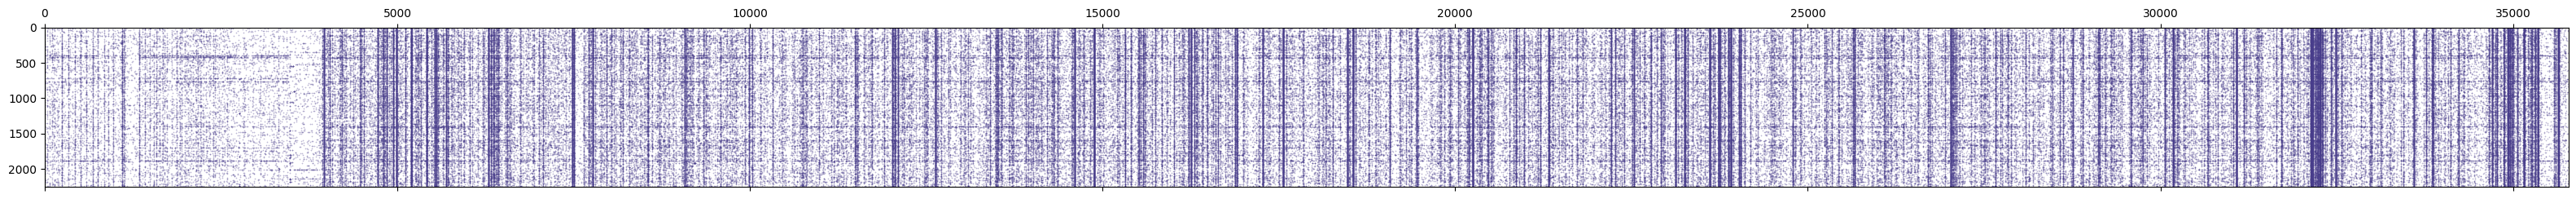

In [207]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:]]
plot_z = X_counts[0:, 0:].toarray()
plt.figure(figsize=(40,25))
plt.spy(plot_z, markersize=0.1, color='Darkslateblue')

##  Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

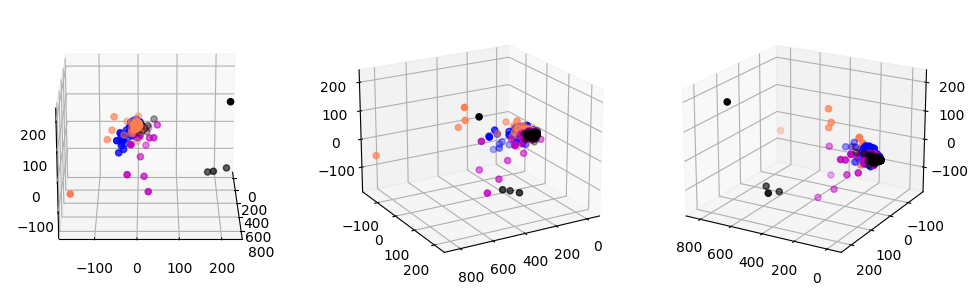

In [208]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize=(12, 10)) 
# ax = fig.add_subplot(1,1,1, projection='3d')
col = ['coral', 'blue', 'black', 'm']
for i in range(3):
    ax = fig.add_subplot(1,3,i+1, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c)
    ax.view_init(elev=20, azim=i*60)

## Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [209]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]    

### Answer
From the table above, we can observe that most of the words only appeared once. Hence, I choose to remove those words, and plot a graph with rest of them, in order to emphasize those that mean more, and save energy on analyzing.

In [210]:
df_drop1 = df_freq[df_freq.term_frequencies != 1]
df_drop1

feature_names  term_frequencies
1               10                38
2              100                 3
3               11                 2
4               12                 4
5               13                 3
...            ...               ...
5142      yourself                 4
5147           yum                 2
5148         yummy                 4
5151          zero                 6
5153        zombie                 2

[2237 rows x 2 columns]

In [182]:
import plotly.express as px
fig = px.bar(y=term_frequencies[:],x=count_vect.get_feature_names()[:],width=2000, height=400,labels={'x':'feature names','y':'term frequencies'})
fig.show()

## Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [212]:
data = {'feature_names':count_vect.get_feature_names(),'term_frequencies':term_frequencies}
df_freq = pd.DataFrame(data)
df_freq

feature_names  term_frequencies
0                00               134
1               000                92
2              0000                 1
3        0000001200                 2
4      000005102000                 1
...             ...               ...
35783         zyxel                 2
35784            zz                 1
35785           zzz                 1
35786            ªl                 1
35787      íålittin                 1

[35788 rows x 2 columns]

### Answer

In [213]:
df_drop1 = df_freq[df_freq.term_frequencies != 1]
df_drop1
import plotly.express as px
fig = px.bar(x=df_drop1.feature_names[:],y=df_drop1.term_frequencies[:],width=800, height=400,labels={'x':'feature names','y':'term frequencies'})
fig.show()

## >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### Answer

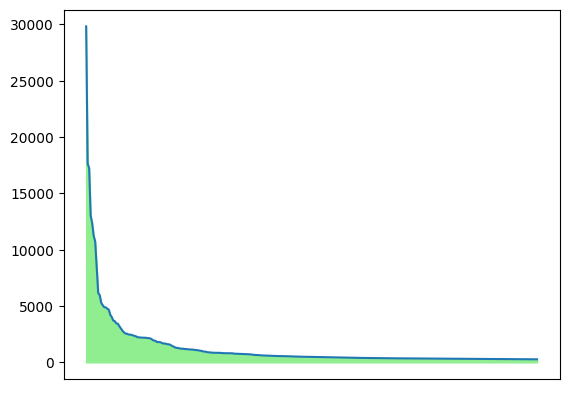

In [214]:
data = {'feature_names':count_vect.get_feature_names(),'term_frequencies':term_frequencies}
df_freq = pd.DataFrame(data)
df_freq_sorted = df_freq.sort_values(by=['term_frequencies'],ascending = False)

plt.plot(df_freq_sorted.feature_names[:300],df_freq_sorted.term_frequencies[:300])

plt.fill_between(df_freq_sorted.feature_names[:300],df_freq_sorted.term_frequencies[:300], color = 'lightgreen')
plt.xticks([])
plt.show()

## >>> Exercise 16 (take home):
Try to generate the binarization using the `category_name` column instead. Does it work?

In [217]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

### Answer

In [218]:
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

---
# Part 2 : New Dataset

## 1. Data Preparation and Transformation

In [219]:
import os

df_amazon = pd.read_table('./sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t",header=None,names=['sentence','score'])
df_amazon['company_name'], df_amazon['company'] = ['amazon',0]
df_imdb = pd.read_table('./sentiment labelled sentences/imdb_labelled.txt', sep="\t",header=None,names=['sentence','score'])
df_imdb['company_name'], df_imdb['company'] = ['imdb',1]
df_yelp = pd.read_table('./sentiment labelled sentences/yelp_labelled.txt', sep="\t",header=None,names=['sentence','score'])
df_yelp['company_name'], df_yelp['company'] = ['yelp',2]
frames = [df_amazon, df_imdb, df_yelp]
df = pd.concat(frames)

# df

In [220]:
df = df.sample(n=len(df))
# df

In [221]:
df[:5]

sentence  score company_name  \
37                         Poor Talk Time Performance.      0       amazon   
193  I have had problems wit hit dropping signal an...      0       amazon   
724                         Awesome selection of beer.      1         yelp   
19    The structure of this film is easily the most...      0         imdb   
942        very slow at seating even with reservation.      0         yelp   

     company  
37         0  
193        0  
724        2  
19         1  
942        2

In [222]:
df.sentence

37                           Poor Talk Time Performance.
193    I have had problems wit hit dropping signal an...
724                           Awesome selection of beer.
19      The structure of this film is easily the most...
942          very slow at seating even with reservation.
                             ...                        
160    All I can do is whine on the Internet, so here...
910    I seriously cannot believe that the owner has ...
163                                   Avoid at all cost!
992    A lady at the table next to us found a live gr...
177    Elias Koteas,Jack Palance play good roles Ange...
Name: sentence, Length: 2748, dtype: object

In [223]:
len(df)

2748

In [224]:
companies = ['amazon','imdb','yelp']
companies

['amazon', 'imdb', 'yelp']

In [225]:
#a simple query
df[0:5][["score", "company_name"]]

score company_name
37       0       amazon
193      0       amazon
724      1         yelp
19       0         imdb
942      0         yelp

In [226]:
#query the last 5 records
df[-5:]

sentence  score company_name  \
160  All I can do is whine on the Internet, so here...      0       amazon   
910  I seriously cannot believe that the owner has ...      0         yelp   
163                                 Avoid at all cost!      0         yelp   
992  A lady at the table next to us found a live gr...      0         yelp   
177  Elias Koteas,Jack Palance play good roles Ange...      1         imdb   

     company  
160        0  
910        2  
163        2  
992        2  
177        1

In [227]:
# using loc (by position)
df.iloc[::5, 0:2][0:5]

sentence  score
37                         Poor Talk Time Performance.      0
129  Garbo, who showed right off the bat that her t...      1
514       Everything was perfect the night we were in.      1
3    Tied to charger for conversations lasting more...      0
487  I dont think I will be back for a very long time.      0

In [228]:
# using loc (by label)
df.loc[::5, 'sentence'][0:5]

37                           Poor Talk Time Performance.
129    Garbo, who showed right off the bat that her t...
514         Everything was perfect the night we were in.
3      Tied to charger for conversations lasting more...
487    I dont think I will be back for a very long time.
Name: sentence, dtype: object

In [229]:
# standard query (Cannot simultaneously select rows and columns)
df[::5][0:5]

sentence  score company_name  \
37                         Poor Talk Time Performance.      0       amazon   
129  Garbo, who showed right off the bat that her t...      1         imdb   
514       Everything was perfect the night we were in.      1         yelp   
3    Tied to charger for conversations lasting more...      0       amazon   
487  I dont think I will be back for a very long time.      0         yelp   

     company  
37         0  
129        1  
514        2  
3          0  
487        2

### Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [230]:
#Answer here
df[df['company']==1][["sentence"]][:5]

sentence
19    The structure of this film is easily the most...
129  Garbo, who showed right off the bat that her t...
369  The CG opening sequence in space looked like i...
82   You can't relate with them, hell you barely ca...
561        This scene is very strong and unpleasant.

### Exercise 3
Try to fecth records belonging to the ```imdb``` category, and query every 10th record. Only show the first 5 records.

In [231]:
# Answer here
df.loc[df['company_name']=="imdb"][::10][:5]

sentence  score company_name  \
19    The structure of this film is easily the most...      0         imdb   
168  I am so pleased to know such a modern day geni...      1         imdb   
405  What is even more stupid is that who had thoug...      0         imdb   
446                              Overall, a delight!        1         imdb   
142  So for our enjoyment we get to see them run ar...      1         imdb   

     company  
19         1  
168        1  
405        1  
446        1  
142        1

## 2. Data Mining using Pandas

In [232]:
df.isnull()

sentence  score  company_name  company
37      False  False         False    False
193     False  False         False    False
724     False  False         False    False
19      False  False         False    False
942     False  False         False    False
..        ...    ...           ...      ...
160     False  False         False    False
910     False  False         False    False
163     False  False         False    False
992     False  False         False    False
177     False  False         False    False

[2748 rows x 4 columns]

In [233]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                         company_name                             company  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [234]:
# Answer here
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

37     (The amoung of missing records is: , 0)
193    (The amoung of missing records is: , 0)
724    (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
942    (The amoung of missing records is: , 0)
                        ...                   
160    (The amoung of missing records is: , 0)
910    (The amoung of missing records is: , 0)
163    (The amoung of missing records is: , 0)
992    (The amoung of missing records is: , 0)
177    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [235]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

dummy_series

sentence    dummy_record
score                  1
dtype: object

In [236]:
result_with_series = df.append(dummy_series, ignore_index=True)
print(len(result_with_series))

2749


In [237]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                         company_name                             company  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   1                                   1

In [238]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'company': 1
              }]
df = df.append(dummy_dict, ignore_index=True)
print(len(df))

2749


In [239]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                         company_name                             company  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   1                                   0

In [240]:
df.dropna(inplace=True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))
print(len(df))

2748


### ```Exercise 5``` and ```Dealing with Duplicate Data``` sessions are exactly the same as above. Hence, pass here.

## 3.Data Preprocessing

### Sampling

In [241]:
df_sample = df.sample(n=1000) #random state
print(len(df_sample))

1000


In [242]:
df_sample[0:5]

sentence  score company_name  \
2353  The yellowtail carpaccio was melt in your mout...    1.0         yelp   
2349                                   GO AND SEE IT!      1.0         imdb   
2730  These are certainly very comfortable and funct...    1.0       amazon   
1775  All the actors give a wonderful performance, e...    1.0         imdb   
1170  It makes very strange ticking noises before it...    0.0       amazon   

      company  
2353        2  
2349        1  
2730        0  
1775        1  
1170        0

### ```Exercise 6```session is exactly the same as above. Hence, pass here.

### Matplotlib

In [243]:
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
companies

['amazon', 'imdb', 'yelp']

yelp      382
amazon    356
imdb      262
Name: company_name, dtype: int64


<AxesSubplot:title={'center':'Company distribution'}>

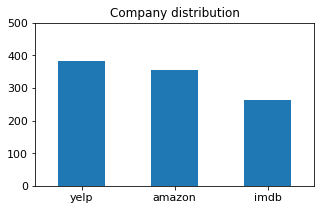

In [245]:
#showing the number of data for each company
print(df_sample.company_name.value_counts())

# plot barchart for df_sample
df_sample.company_name.value_counts().plot(kind = 'bar',
                                    title = 'Company distribution',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (5,3))

### >>> Exercise 7 (5 min):
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

yelp      382
amazon    356
imdb      262
Name: company_name, dtype: int64


<AxesSubplot:title={'center':'Company distribution'}>

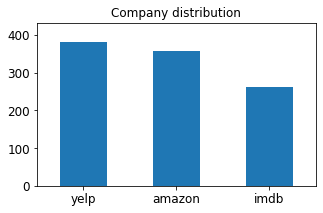

In [246]:
upper_bound = max(df_sample.company_name.value_counts()) + 50

print(df_sample.company_name.value_counts())

# plot barchart for X_sample
df_sample.company_name.value_counts().plot(kind = 'bar',
                                           title = 'Company distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (5,3))


### >>>Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

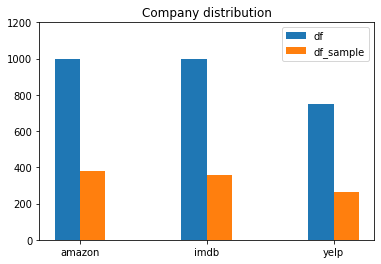

In [247]:
import numpy as np
blue_bar = df.company_name.value_counts().values.tolist()
orange_bar = df_sample.company_name.value_counts().values.tolist()
# print(blue_bar)
# print(orange_bar)
labels = companies
indent = np.arange(len(labels))
plt.figure(figsize=(6, 4))
width = 0.2

plt.bar(indent, blue_bar, width, label='df')
plt.bar(indent+width, orange_bar, width, label='df_sample')
plt.title('Company distribution')
plt.xticks(indent+width/2, labels)
plt.ylim([0,1200])
plt.style.use('default')
plt.legend(loc=None)
plt.show()

### Feature Creation

In [248]:
import nltk
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [249]:
df[0:4]

sentence  score company_name  \
0                        Poor Talk Time Performance.    0.0       amazon   
1  I have had problems wit hit dropping signal an...    0.0       amazon   
2                         Awesome selection of beer.    1.0         yelp   
3   The structure of this film is easily the most...    0.0         imdb   

   company                                           unigrams  
0        0                 [Poor, Talk, Time, Performance, .]  
1        0  [I, have, had, problems, wit, hit, dropping, s...  
2        2                  [Awesome, selection, of, beer, .]  
3        1  [The, structure, of, this, film, is, easily, t...

In [250]:
df[0:4]["unigrams"]

0                   [Poor, Talk, Time, Performance, .]
1    [I, have, had, problems, wit, hit, dropping, s...
2                    [Awesome, selection, of, beer, .]
3    [The, structure, of, this, film, is, easily, t...
Name: unigrams, dtype: object

### Feature Subset Selection

In [251]:
from sklearn.feature_extraction.text import CountVectorizer

df_count_vect = CountVectorizer()
df_counts = df_count_vect.fit_transform(df.sentence)

### >>> Exercise 9 (5 min):
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [252]:
analyze = df_count_vect.build_analyzer()
analyze(df.iloc[0]['sentence'])

['poor', 'talk', 'time', 'performance']

---

In [253]:
df_counts.shape

(2748, 5155)

In [254]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
df_count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [255]:
df[5:10]

sentence  score company_name  \
5  Garbo, who showed right off the bat that her t...    1.0         imdb   
6  The CG opening sequence in space looked like i...    0.0         imdb   
7  You can't relate with them, hell you barely ca...    0.0         imdb   
8  When I received my Pita it was huge it did hav...    1.0         yelp   
9        This scene is very strong and unpleasant.      0.0         imdb   

   company                                           unigrams  
5        1  [Garbo, ,, who, showed, right, off, the, bat, ...  
6        1  [The, CG, opening, sequence, in, space, looked...  
7        1  [You, ca, n't, relate, with, them, ,, hell, yo...  
8        2  [When, I, received, my, Pita, it, was, huge, i...  
9        1  [This, scene, is, very, strong, and, unpleasan...

In [256]:
df_counts[215:216,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

### >>> Exercise 10 (take home):
Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [257]:
for i in range(1000):
    if df_counts[215, i] == 1:
        print(str(i)+": "+ df_count_vect.get_feature_names()[i])

216: and


## 4. Visualization

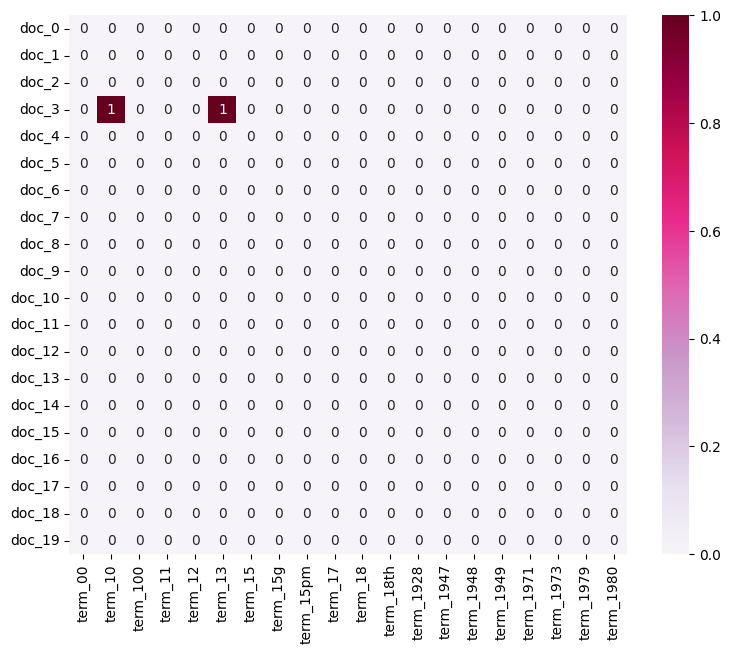

In [258]:
plot_dfx = ["term_"+str(i) for i in df_count_vect.get_feature_names()[0:20]]

# obtain document index
plot_dfy = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_dfz = df_counts[0:20, 0:20].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_dfz, columns = plot_dfx, index = plot_dfy)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 11 (take home):
 As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? 
 
Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

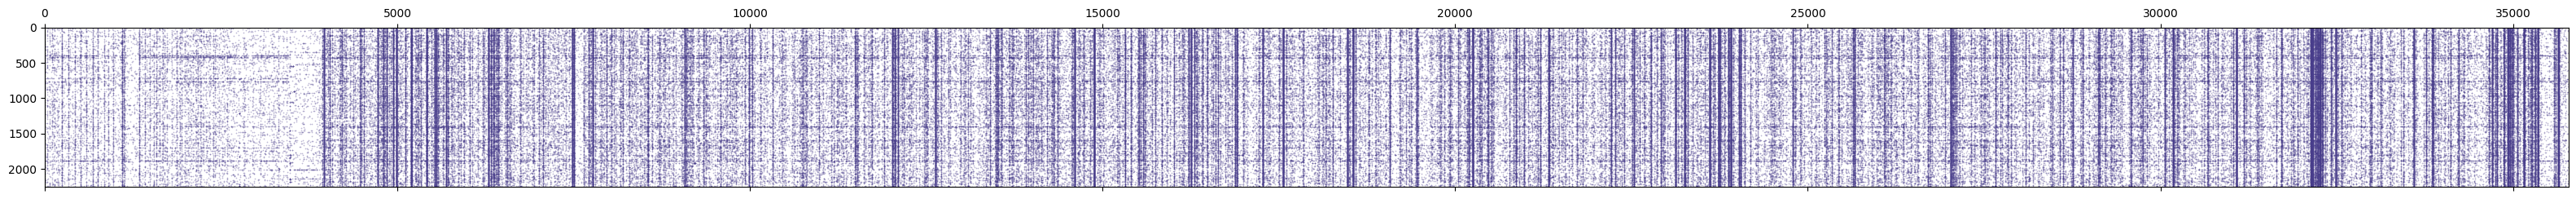

In [259]:
import seaborn as sns
plot_dfx = ["term_"+str(i) for i in df_count_vect.get_feature_names()[0:]]
plot_dfy = ["doc_"+ str(i) for i in list(X.index)[0:]]
plot_dfz = X_counts[0:, 0:].toarray()
plt.figure(figsize=(40,25))
plt.spy(plot_dfz, markersize=0.1, color='Darkslateblue')

### Dimensionality Reduction

In [260]:
from sklearn.decomposition import PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape

(2748, 2)

In [261]:
companies

['amazon', 'imdb', 'yelp']

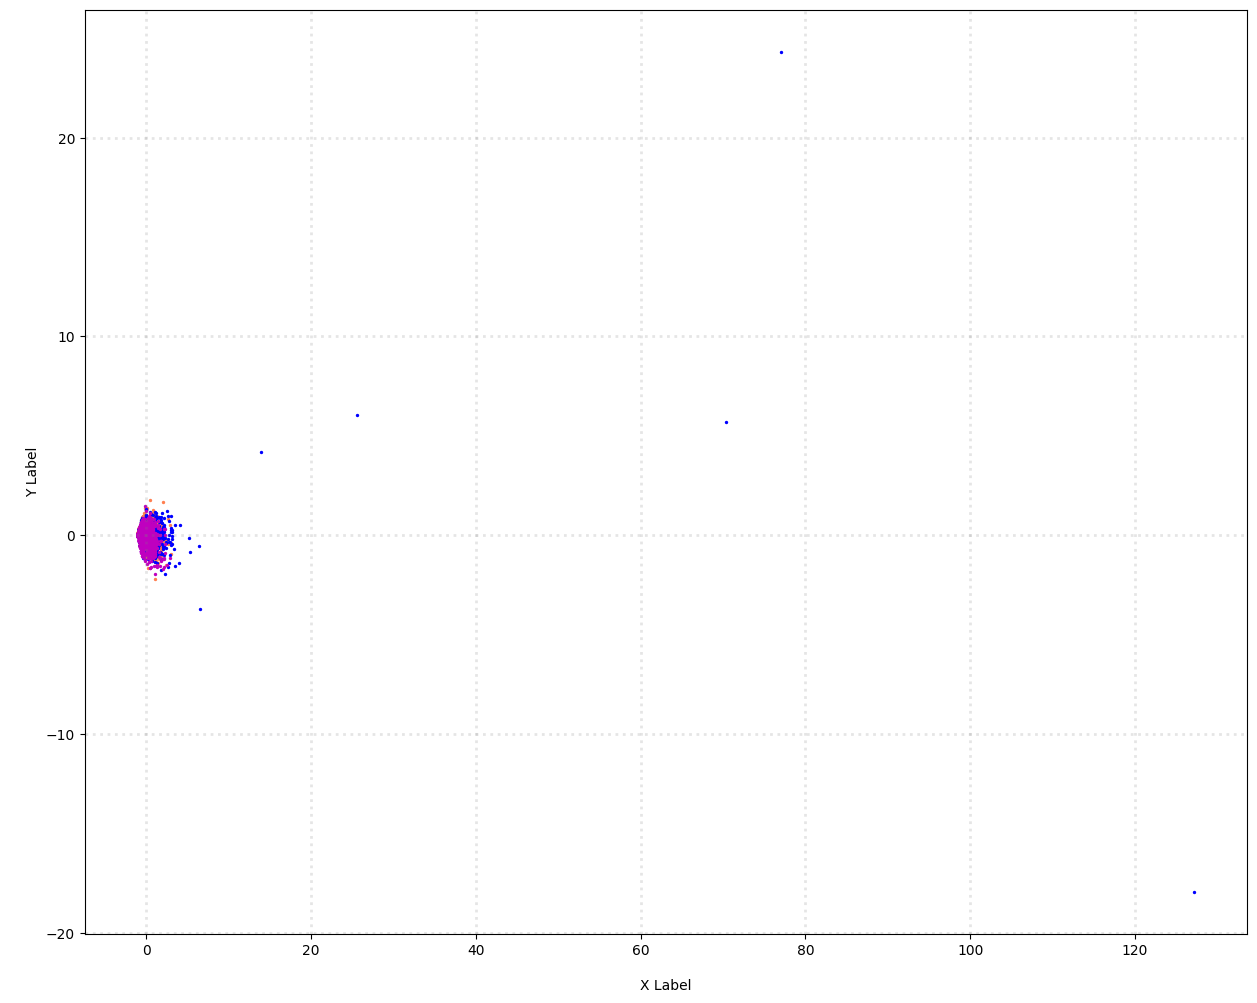

In [262]:
col = ['coral', 'blue', 'm']

# plot
fig = plt.figure(figsize = (15,12))
ax = fig.subplots()

for c, comp in zip(col, companies):
    xs = df_reduced[df['company_name'] == comp].T[0]
    ys = df_reduced[df['company_name'] == comp].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o',s=2)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

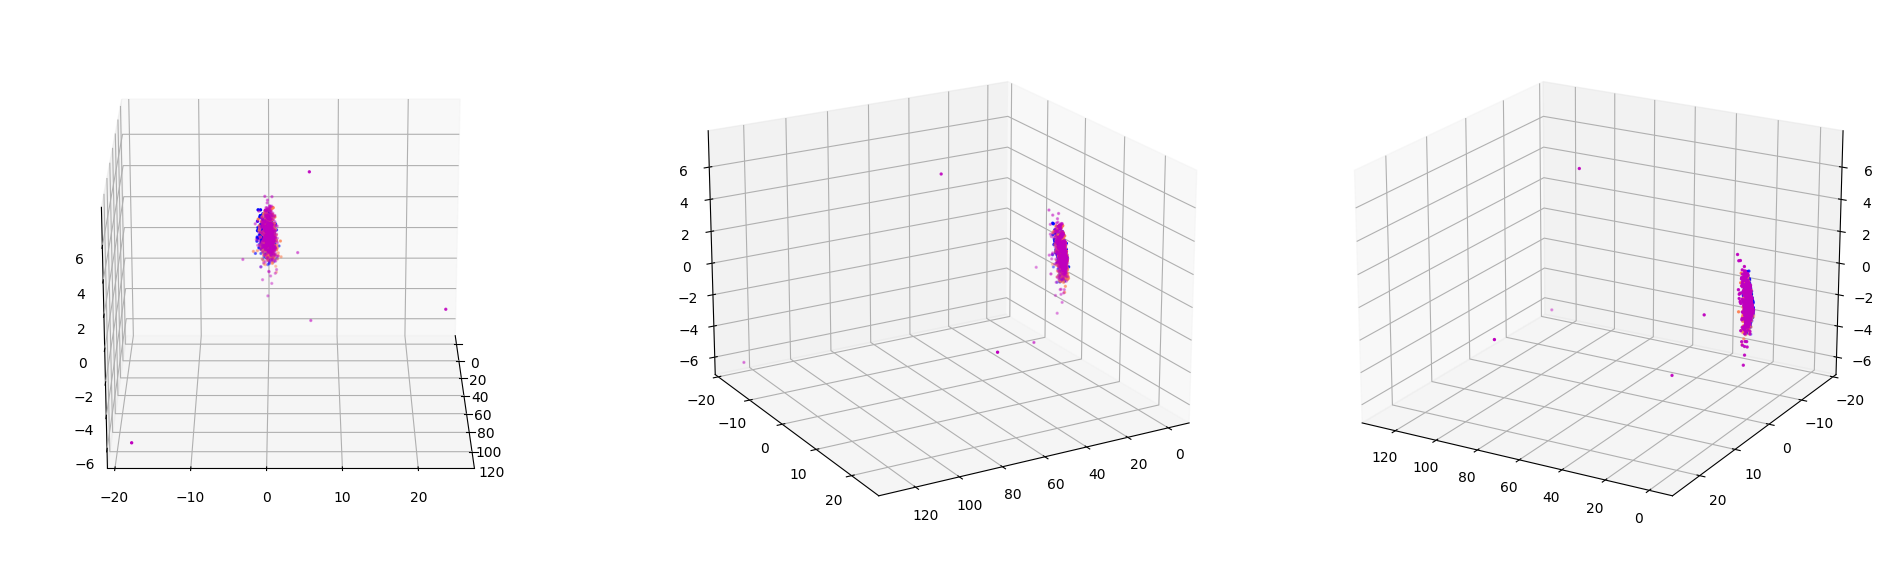

In [263]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

fig = plt.figure(figsize=(24, 20)) 

col = ['coral', 'm', 'blue']
for i in range(3):
    ax = fig.add_subplot(1,3,i+1, projection='3d')
    for c, comp in zip(col, companies):
        xs = df_reduced[df['company_name'] == comp].T[0]
        ys = df_reduced[df['company_name'] == comp].T[1]
        zs = df_reduced[df['company_name'] == comp].T[2]
        ax.scatter(xs, ys, zs, c=c, s=2)
    ax.view_init(elev=20, azim=i*60)

### Atrribute Transformation / Aggregation

In [264]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [265]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0]

1

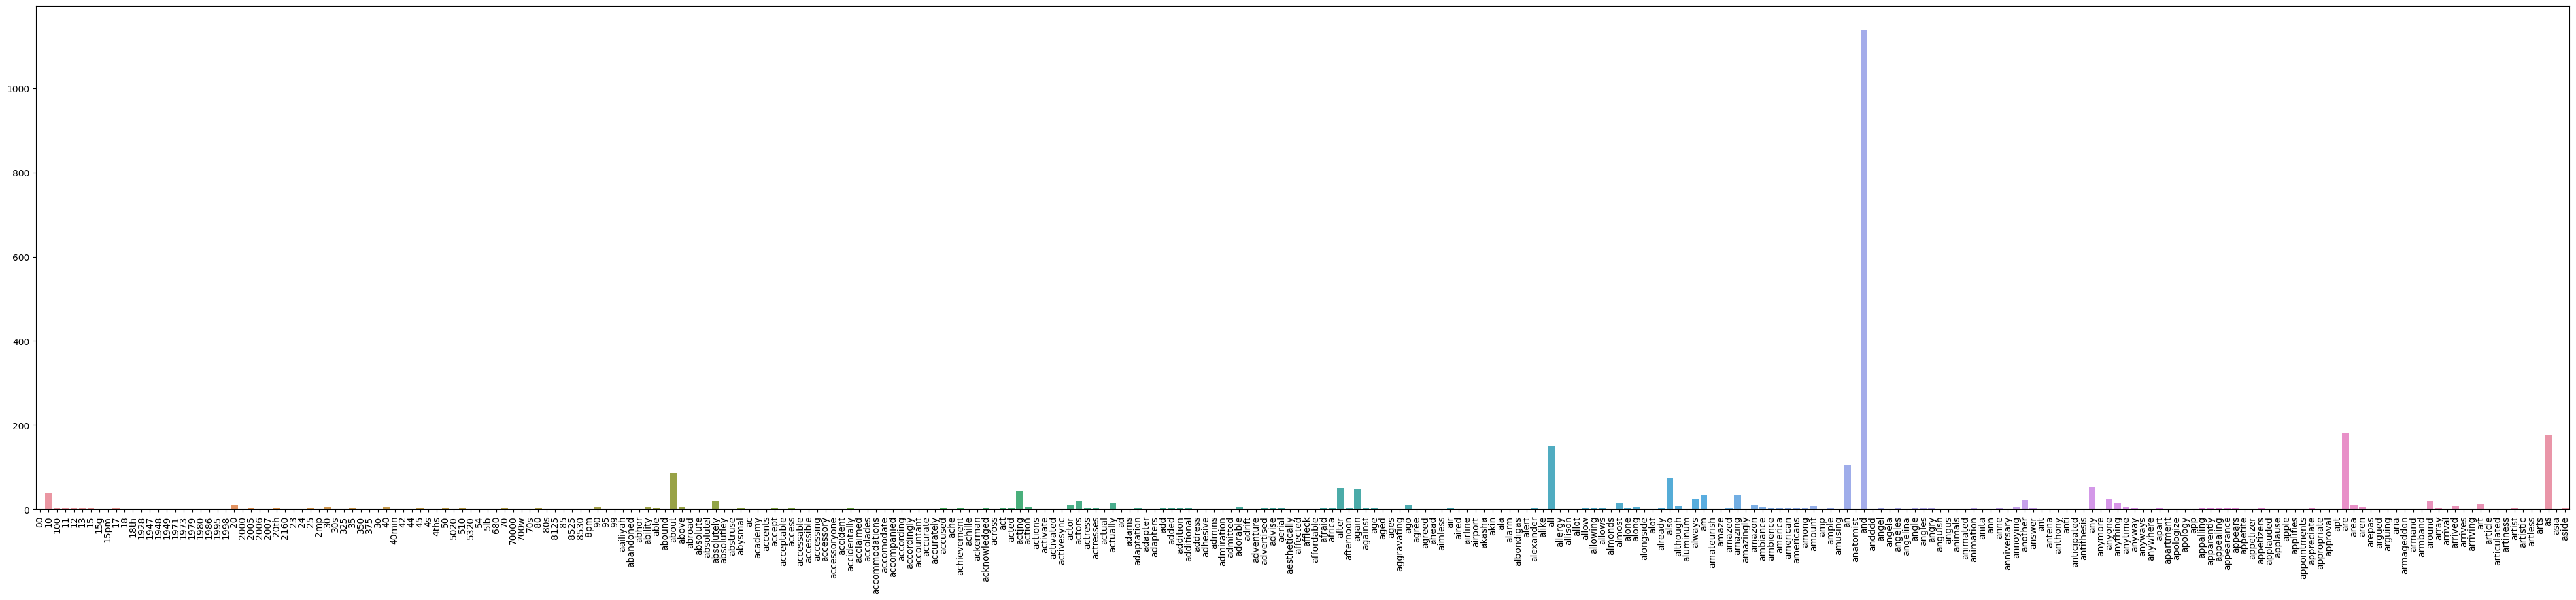

In [266]:
plt.subplots(figsize=(50, 10))
g = sns.barplot(x= df_count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(df_count_vect.get_feature_names()[:300], rotation = 90);

### >>> Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [279]:
import plotly.express as px
fig = px.bar(y=term_frequencies[:300],x= df_count_vect.get_feature_names()[:300],width=800, height=300,labels={'x':'feature names','y':'term frequencies'})
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [280]:
len(df_count_vect.get_feature_names())

5155

In [281]:
data = {'feature_names': df_count_vect.get_feature_names(),'term_frequencies':term_frequencies}
df_freq = pd.DataFrame(data)
df_freq

feature_names  term_frequencies
0               00                 1
1               10                38
2              100                 3
3               11                 2
4               12                 4
...            ...               ...
5150         z500a                 1
5151          zero                 6
5152       zillion                 1
5153        zombie                 2
5154       zombiez                 1

[5155 rows x 2 columns]

### Answer

In [282]:
df_drop1 = df_freq[df_freq.term_frequencies != 1]
df_drop1
import plotly.express as px
fig = px.bar(x=df_drop1.feature_names[:],y=df_drop1.term_frequencies[:],width=800, height=400,labels={'x':'feature names','y':'term frequencies'})
fig.show()

## >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### Answer

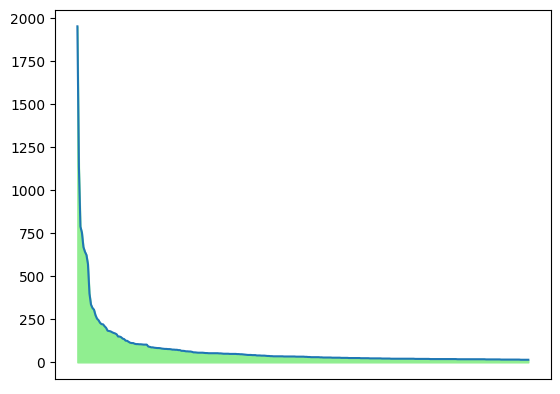

In [283]:
data = {'feature_names': df_count_vect.get_feature_names(),'term_frequencies':term_frequencies}
df_freq = pd.DataFrame(data)
df_freq_sorted = df_freq.sort_values(by=['term_frequencies'],ascending = False)

plt.plot(df_freq_sorted.feature_names[:300],df_freq_sorted.term_frequencies[:300])

plt.fill_between(df_freq_sorted.feature_names[:300],df_freq_sorted.term_frequencies[:300], color = 'lightgreen')
plt.xticks([])
plt.show()

## >>> Exercise 16 (take home):
Try to generate the binarization using the `category_name` column instead. Does it work?

In [289]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

### Answer

In [290]:
mlb.fit(df.company_name)
df['bin_company'] = mlb.transform(df['company_name']).tolist()
df[0:9]

sentence  score company_name  \
0                        Poor Talk Time Performance.    0.0       amazon   
1  I have had problems wit hit dropping signal an...    0.0       amazon   
2                         Awesome selection of beer.    1.0         yelp   
3   The structure of this film is easily the most...    0.0         imdb   
4        very slow at seating even with reservation.    0.0         yelp   
5  Garbo, who showed right off the bat that her t...    1.0         imdb   
6  The CG opening sequence in space looked like i...    0.0         imdb   
7  You can't relate with them, hell you barely ca...    0.0         imdb   
8  When I received my Pita it was huge it did hav...    1.0         yelp   

   company                                           unigrams bin_company  
0        0                 [Poor, Talk, Time, Performance, .]   [1, 0, 0]  
1        0  [I, have, had, problems, wit, hit, dropping, s...   [1, 0, 0]  
2        2                  [Awesome, selection, of, beer, .]   [0, 0, 1]  
3        1  [The, structure, of, this, film, is, easily, t...   [0, 1, 0]  
4        2  [very, slow, at, seating, even, with, reservat...   [0, 0, 1]  
5        1  [Garbo, ,, who, showed, right, off, the, bat, ...   [0, 1, 0]  
6        1  [The, CG, opening, sequence, in, space, looked...   [0, 1, 0]  
7        1  [You, ca, n't, relate, with, them, ,, hell, yo...   [0, 1, 0]  
8        2  [When, I, received, my, Pita, it, was, huge, i...   [0, 0, 1]

---
# Part 3 : TF-IDF features 

In [320]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_sentence = df.sentence
vec = TfidfVectorizer()
Y = vec.fit_transform(df_sentence)
vec.get_feature_names()
pipe = Pipeline([('count', df_count_vect),('tfid', TfidfTransformer())]).fit(df_sentence)
Y_arr = pipe['count'].transform(df_sentence).toarray()
Y_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [321]:
pipe['tfid'].idf_

array([8.22584531, 5.51779511, 7.53269813, ..., 8.22584531, 7.8203802 ,
       8.22584531])

---
# Part 4 : Naive Bayes classifier

In [327]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


In [329]:
# store the feature matrix (X) and response vector (y)
X = Y_arr
y = df.score
  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 68.27272727272728
